### IMPORTING LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from collections import defaultdict
from time import sleep
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics

In [2]:
data = pd.read_csv("roo_data.csv")

In [3]:
print("shape of df is :", data.shape)

shape of df is : (20000, 39)


### PREPROCESSING

In [4]:
data = data.replace(to_replace = ["Database Administrator", "Portal Administrator", 'Systems Security Administrator', 'Network Security Administrator'], value = "Adminstrator")

data = data.replace(to_replace = ["CRM Business Analyst", 'Business Intelligence Analyst', 'E-Commerce Analyst', "Business Systems Analyst", 'Information Security Analyst', 'Programmer Analyst', 'Systems Analyst'], value = "Analyst")

data = data.replace(to_replace = ['Database Developer', 'Applications Developer', 'CRM Technical Developer','Mobile Applications Developer', 'Web Developer','Software Developer'], value = "Developer")

data = data.replace(to_replace = ["Design & UX", 'UX Designer'] , value = "Designer")

data = data.replace(to_replace = ['Solutions Architect', 'Data Architect'] , value = "Architect")

data = data.replace(to_replace = ['Project Manager','Information Technology Manager', 'Database Manager'], value = "Manager")

data = data.replace(to_replace = ["Network Security Engineer", 'Network Engineer', 'Software Engineer', 'Technical Engineer', "Software Systems Engineer"], value = "Engineer")

data = data.replace(to_replace = ['Quality Assurance Associate', 'Technical Support', 'Technical Services/Help Desk/Tech Support','Information Technology Auditor', 'Software Quality Assurance (QA) / Testing'], value = "Technical Support")

In [5]:
data["talenttests taken?"] = data["talenttests taken?"] + data["olympiads"]

data.drop('olympiads', axis=1, inplace=True)

data["certifications"] = data["Extra-courses did"] + data["certifications"]

data.drop('Extra-courses did', axis=1, inplace=True)

data.drop('Taken inputs from seniors or elders',axis=1, inplace=True)

data.drop('interested in games',axis=1, inplace=True)

data.drop("Interested Type of Books",axis=1,inplace=True)

data.drop('In a Realtionship?',axis=1, inplace=True)


In [6]:
data["Acedamic percentage in Operating Systems"] = data["Acedamic percentage in Operating Systems"].floordiv(10)

data["percentage in Algorithms"] = data["percentage in Algorithms"].floordiv(10)

data["Percentage in Programming Concepts"] = data["Percentage in Programming Concepts"].floordiv(10)

data["Percentage in Software Engineering"] = data["Percentage in Software Engineering"].floordiv(10)

data["Percentage in Computer Networks"] = data["Percentage in Computer Networks"].floordiv(10)

data["Percentage in Electronics Subjects"] = data["Percentage in Electronics Subjects"].floordiv(10)

data["Percentage in Computer Architecture"] = data["Percentage in Computer Architecture"].floordiv(10)

data["Percentage in Mathematics"] = data["Percentage in Mathematics"].floordiv(10)

data["Percentage in Communication skills"] = data["Percentage in Communication skills"].floordiv(10)



In [7]:
data.loc[data["Acedamic percentage in Operating Systems"] <=6, "Acedamic percentage in Operating Systems"] = 1
data.loc[data["Acedamic percentage in Operating Systems"] == 7, "Acedamic percentage in Operating Systems"] = 2
data.loc[data["Acedamic percentage in Operating Systems"] >=8, "Acedamic percentage in Operating Systems"] = 3

data.loc[data["percentage in Algorithms"] <=6, "percentage in Algorithms"] = 1
data.loc[data["percentage in Algorithms"] == 7, "percentage in Algorithms"] = 2
data.loc[data["percentage in Algorithms"] >=8, "percentage in Algorithms"] = 3


data.loc[data["Percentage in Communication skills"] <=6, "Percentage in Communication skills"] = 1
data.loc[data["Percentage in Communication skills"] == 7, "Percentage in Communication skills"] = 2
data.loc[data["Percentage in Communication skills"] >=8, "Percentage in Communication skills"] = 3


data.loc[data["Percentage in Programming Concepts"] <=6, "Percentage in Programming Concepts"] = 1
data.loc[data["Percentage in Programming Concepts"] == 7, "Percentage in Programming Concepts"] = 2
data.loc[data["Percentage in Programming Concepts"] >=8, "Percentage in Programming Concepts"] = 3



data.loc[data["Percentage in Software Engineering"] <=6, "Percentage in Software Engineering"] = 1
data.loc[data["Percentage in Software Engineering"] == 7, "Percentage in Software Engineering"] = 2
data.loc[data["Percentage in Software Engineering"] >=8, "Percentage in Software Engineering"] = 3



data.loc[data["Percentage in Computer Networks"] <=6, "Percentage in Computer Networks"] = 1
data.loc[data["Percentage in Computer Networks"] == 7, "Percentage in Computer Networks"] = 2
data.loc[data["Percentage in Computer Networks"] >=8, "Percentage in Computer Networks"] = 3



data.loc[data["Percentage in Electronics Subjects"] <=6, "Percentage in Electronics Subjects"] = 1
data.loc[data["Percentage in Electronics Subjects"] == 7, "Percentage in Electronics Subjects"] = 2
data.loc[data["Percentage in Electronics Subjects"] >=8, "Percentage in Electronics Subjects"] = 3



data.loc[data["Percentage in Mathematics"] <=6, "Percentage in Mathematics"] = 1
data.loc[data["Percentage in Mathematics"] == 7, "Percentage in Mathematics"] = 2
data.loc[data["Percentage in Mathematics"] >=8, "Percentage in Mathematics"] = 3



data.loc[data["Percentage in Computer Architecture"] <=6, "Percentage in Computer Architecture"] = 1
data.loc[data["Percentage in Computer Architecture"] == 7, "Percentage in Computer Architecture"] = 2
data.loc[data["Percentage in Computer Architecture"] >=8, "Percentage in Computer Architecture"] = 3

In [8]:
le = LabelEncoder()

data["can work long time before system?"] = le.fit_transform(data["can work long time before system?"])


data["self-learning capability?"] = le.fit_transform(data["self-learning capability?"])


data["certifications"] = le.fit_transform(data["certifications"])


data["workshops"] = le.fit_transform(data["workshops"])



data["talenttests taken?"] = le.fit_transform(data["talenttests taken?"])

data["hard/smart worker"] = le.fit_transform(data["hard/smart worker"])

data["reading and writing skills"] = le.fit_transform(data["reading and writing skills"])

data["Job/Higher Studies?"] = le.fit_transform(data["Job/Higher Studies?"])

data["Introvert"] = le.fit_transform(data["Introvert"])

data["Gentle or Tuff behaviour?"] = le.fit_transform(data["Gentle or Tuff behaviour?"])


data["memory capability score"] = le.fit_transform(data["memory capability score"])



data["Interested subjects"] = le.fit_transform(data["Interested subjects"])


data["interested career area "] = le.fit_transform(data["interested career area "])



data["Type of company want to settle in?"] = le.fit_transform(data["Type of company want to settle in?"])



data["Salary Range Expected"] = le.fit_transform(data["Salary Range Expected"])



data["Management or Technical"] = le.fit_transform(data["Management or Technical"])


data["Salary/work"] = le.fit_transform(data["Salary/work"])


data["worked in teams ever?"] = le.fit_transform(data["worked in teams ever?"])


data["Suggested Job Role"] = le.fit_transform(data["Suggested Job Role"])


In [9]:
data["Hours working per day"] = data["Hours working per day"].floordiv(3)


data["Logical quotient rating"] = data["Logical quotient rating"].floordiv(3)


data["hackathons"] = data["hackathons"].floordiv(2)

data["coding skills rating"] = data["coding skills rating"].floordiv(3)


data["public speaking points"] = data["public speaking points"].floordiv(3)



### CORELLATION BETWEEN THE DATA

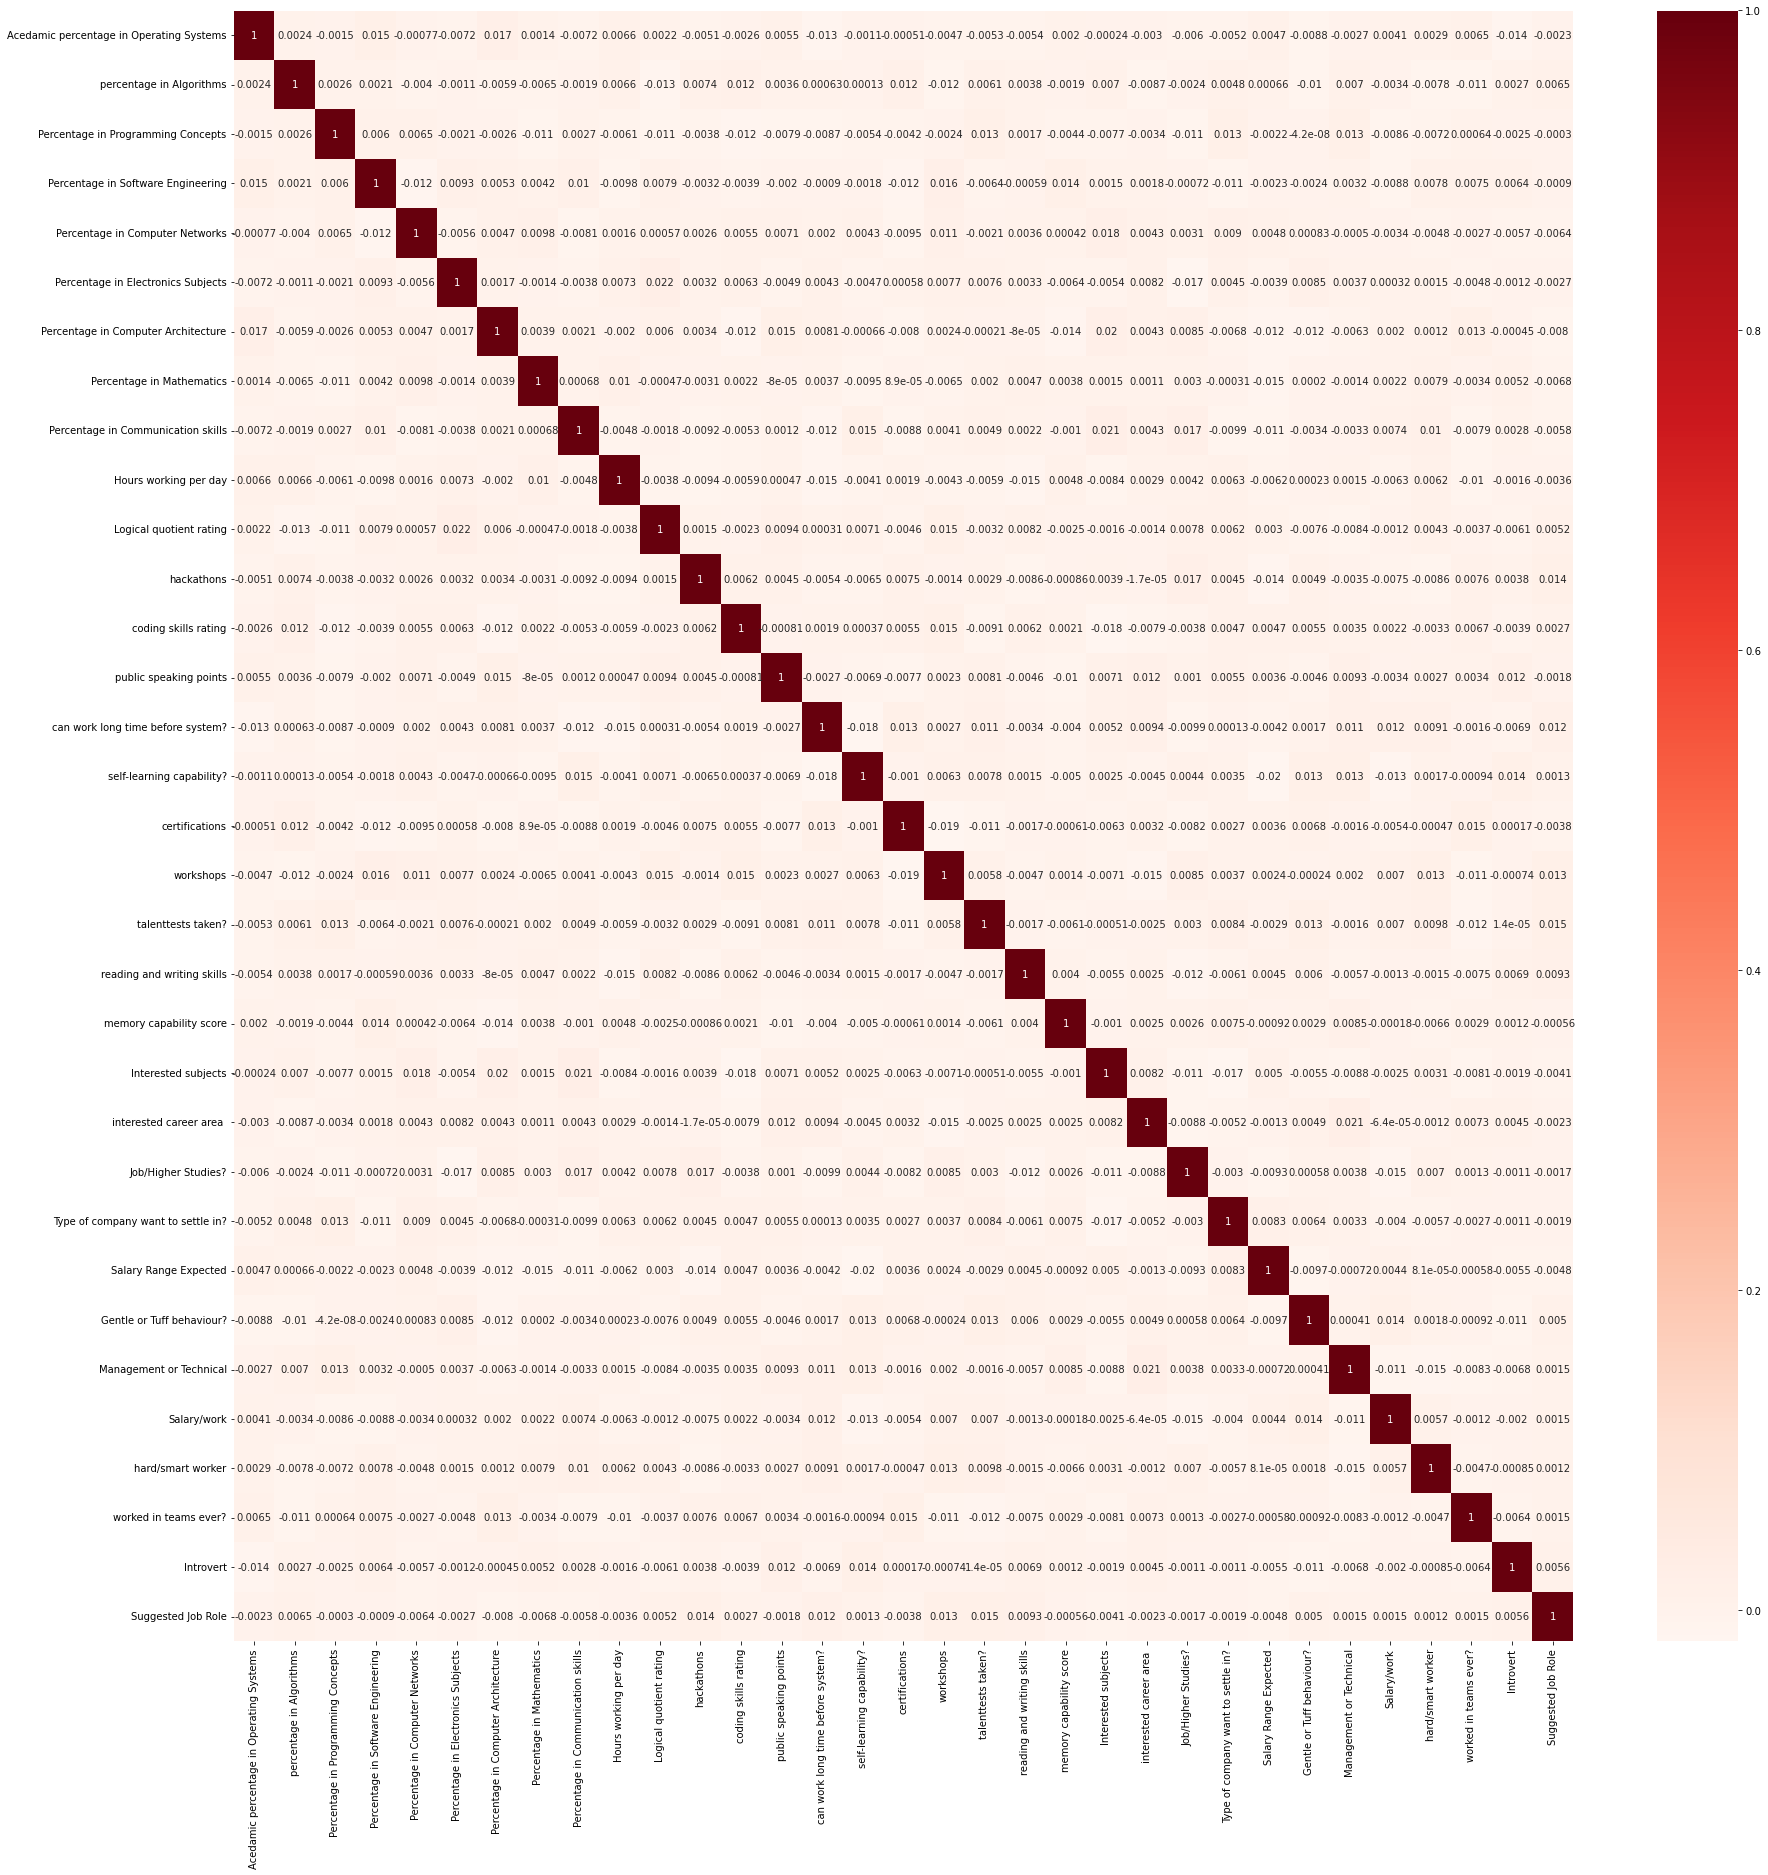

In [10]:
plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### MLP CLASSIFIER

In [11]:
tt55 = list(range(data.shape[0]))
tt64 = list(range(data.shape[0]))
tt73 = list(range(data.shape[0]))
tt82 = list(range(data.shape[0]))
tt91 = list(range(data.shape[0]))

##### 50-50 TRAIN-TEST SPLIT

In [12]:
temp = random.sample(tt55,int(0.5*data.shape[0]))

for x in temp:
    tt55.remove(x)

    
trainset = data.drop(tt55)
testset   = data.drop(temp)

training_y = trainset['Suggested Job Role']
testing_y = testset['Suggested Job Role']

training_x = trainset.drop('Suggested Job Role',axis="columns")
testing_x = testset.drop('Suggested Job Role',axis="columns")

classifier = MLPClassifier(max_iter=1000).fit(training_x, training_y)

print("Accuracy:", classifier.score(testing_x, testing_y))

Accuracy: 0.1518


In [13]:
cm=confusion_matrix(testing_y, classifier.predict(testing_x))
confusion_matrix(testing_y, classifier.predict(testing_x))

array([[200, 351,  28,  19, 330, 253,  57, 190],
       [321, 466,  42,  24, 414, 330,  86, 285],
       [ 85, 145,  10,   5, 109, 115,  17,  83],
       [ 81, 126,  14,   8, 129, 113,  20,  97],
       [287, 432,  34,  26, 348, 271,  60, 242],
       [190, 396,  29,  21, 303, 230,  64, 218],
       [136, 202,  23,  11, 189, 141,  33, 155],
       [213, 354,  32,  23, 270, 242,  49, 223]], dtype=int64)

In [14]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.14005602, 0.23678862, 0.01757469, 0.01360544, 0.20470588,
       0.15851137, 0.03707865, 0.15860597])

##### 60-40 TRAIN-TEST SPLIT

In [15]:
temp = random.sample(tt64,int(0.6*data.shape[0]))

for x in temp:
    tt64.remove(x)

    
trainset = data.drop(tt64)
testset   = data.drop(temp)

training_y = trainset['Suggested Job Role']
testing_y = testset['Suggested Job Role']

training_x = trainset.drop('Suggested Job Role',axis="columns")
testing_x = testset.drop('Suggested Job Role',axis="columns")

classifier = MLPClassifier(max_iter=1000).fit(training_x, training_y)

print("Accuracy:", classifier.score(testing_x, testing_y))


Accuracy: 0.157875


In [16]:
cm=confusion_matrix(testing_y, classifier.predict(testing_x))
confusion_matrix(testing_y, classifier.predict(testing_x))

array([[176, 300,  23,  13, 181, 202,  34, 177],
       [240, 437,  20,  25, 248, 259,  42, 275],
       [ 77, 125,   3,   5,  88,  89,  12,  88],
       [ 72, 128,  13,   5,  75,  98,  17,  86],
       [219, 363,  18,  15, 183, 245,  51, 270],
       [206, 293,  13,  15, 161, 227,  42, 246],
       [ 96, 216,   7,   5, 113, 122,  18, 111],
       [163, 288,  17,  17, 176, 207,  30, 214]], dtype=int64)

In [17]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.15913201, 0.28266494, 0.00616016, 0.01012146, 0.13416422,
       0.18869493, 0.02616279, 0.19244604])

##### 70-30 TRAIN-TEST SPLIT

In [18]:
temp = random.sample(tt73,int(0.7*data.shape[0]))

for x in temp:
    tt73.remove(x)

    
trainset = data.drop(tt73)
testset   = data.drop(temp)

training_y = trainset['Suggested Job Role']
testing_y = testset['Suggested Job Role']

training_x = trainset.drop('Suggested Job Role',axis="columns")
testing_x = testset.drop('Suggested Job Role',axis="columns")

classifier = MLPClassifier(max_iter=1000).fit(training_x, training_y)

print("Accuracy:", classifier.score(testing_x, testing_y))


Accuracy: 0.16583333333333333


In [19]:
cm=confusion_matrix(testing_y, classifier.predict(testing_x))
confusion_matrix(testing_y, classifier.predict(testing_x))

array([[ 99, 328,   6,  14, 140, 113,  14, 149],
       [129, 437,   8,  16, 210, 152,  23, 201],
       [ 37, 127,   1,   2,  59,  35,   9,  62],
       [ 44, 124,   2,   6,  71,  47,   8,  46],
       [116, 385,   6,  11, 168, 139,  17, 166],
       [ 89, 324,   2,  17, 176, 109,  16, 167],
       [ 56, 203,   6,   5,  94,  63,  10,  89],
       [104, 296,   9,  11, 152,  97,  13, 165]], dtype=int64)

In [20]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.11471611, 0.37159864, 0.00301205, 0.01724138, 0.16666667,
       0.12111111, 0.01901141, 0.19480519])

In [21]:
##### 80-20 TRAIN-TEST SPLIT

In [22]:
temp = random.sample(tt82,int(0.8*data.shape[0]))

for x in temp:
    tt82.remove(x)

    
trainset = data.drop(tt82)
testset   = data.drop(temp)

training_y = trainset['Suggested Job Role']
testing_y = testset['Suggested Job Role']

training_x = trainset.drop('Suggested Job Role',axis="columns")
testing_x = testset.drop('Suggested Job Role',axis="columns")

classifier = MLPClassifier(max_iter=1000).fit(training_x, training_y)

print("Accuracy:", classifier.score(testing_x, testing_y))

Accuracy: 0.1615


In [23]:
cm=confusion_matrix(testing_y, classifier.predict(testing_x))
confusion_matrix(testing_y, classifier.predict(testing_x))

array([[ 39, 220,   6,   2, 102,  75,   2,  99],
       [ 60, 299,   4,   9, 135, 107,   2, 153],
       [ 19, 101,   0,   1,  46,  22,   1,  46],
       [ 11,  83,   1,   1,  50,  35,   1,  60],
       [ 54, 293,   4,   5, 107,  85,   2, 131],
       [ 45, 231,   4,  10, 117,  79,   2, 138],
       [ 24, 149,   3,   0,  49,  45,   4,  83],
       [ 46, 209,  11,   7,  91,  62,   1, 117]], dtype=int64)

In [24]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.07155963, 0.38881664, 0.        , 0.00413223, 0.15712188,
       0.12619808, 0.01120448, 0.21507353])

In [25]:
##### 90-10 TRAIN-TEST SPLIT

In [26]:
temp = random.sample(tt91,int(0.9*data.shape[0]))

for x in temp:
    tt91.remove(x)

    
trainset = data.drop(tt91)
testset   = data.drop(temp)

training_y = trainset['Suggested Job Role']
testing_y = testset['Suggested Job Role']

training_x = trainset.drop('Suggested Job Role',axis="columns")
testing_x = testset.drop('Suggested Job Role',axis="columns")

classifier = MLPClassifier(max_iter=1000).fit(training_x, training_y)

print("Accuracy:", classifier.score(testing_x, testing_y))

Accuracy: 0.1455


In [27]:
cm=confusion_matrix(testing_y, classifier.predict(testing_x))
confusion_matrix(testing_y, classifier.predict(testing_x))

array([[ 29,  93,   4,   0,  86,  47,   2,  21],
       [ 49, 106,   2,   1, 115,  61,   2,  34],
       [ 20,  32,   0,   0,  36,  19,   0,  12],
       [ 12,  40,   1,   0,  31,  14,   1,   8],
       [ 47, 112,   4,   3, 102,  44,   2,  39],
       [ 43, 116,   3,   1,  95,  40,   0,  28],
       [ 21,  66,   1,   1,  57,  20,   0,  11],
       [ 18, 100,   2,   1,  91,  36,   4,  14]], dtype=int64)

In [28]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.10283688, 0.28648649, 0.        , 0.        , 0.28895184,
       0.12269939, 0.        , 0.05263158])

### LOGISTIC REGRESSION

In [29]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr.fit(training_x, training_y)
print("Accuracy:", metrics.accuracy_score(testing_y, lr.predict(testing_x)))

Accuracy: 0.1845


### SVM CLASSIFIER

In [30]:
svm = SVC(kernel='poly', degree=15)
svm.fit(training_x, training_y)
print("Accuracy:",metrics.accuracy_score(testing_y, svm.predict(testing_x)))

Accuracy: 0.139


### RANDOM FOREST CLASSIFIER

In [31]:
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(training_x,training_y)
print("Accuracy:",metrics.accuracy_score(testing_y, rfc.predict(testing_x)))

Accuracy: 0.153
